In [ ]:
!pip install tweepy
!pip install selenium

In [ ]:
!pip install selenium


In [ ]:
import pandas as pd
import numpy as np
import tweepy
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
wordnet = WordNetLemmatizer()
import re
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import requests
from bs4 import BeautifulSoup as bs
from selenium import webdriver

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
oneplus_reviews=[]

In [ ]:
for i in range (1,31):
    op=[]
    url ="https://www.amazon.in/Test-Exclusive-747/product-reviews/B07DJCVTDN/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"+str(i)
    response = requests.get(url)
    soup = bs(response.content,"html.parser")
    reviews = soup.findAll("span",attrs = {"class","a-size-base review-text review-text-content"})
    for i in range(len(reviews)):
        op.append(reviews[i].text)
    oneplus_reviews = oneplus_reviews+op

In [ ]:
oneplus_reviews = list(set(oneplus_reviews))

In [ ]:
oneplus_reviews

["\nSo I got this in June 2020 for 35k. Writing this review after a usage of 9 months. My main usages are camera, music, watching OTTs and social media. Not a big fan of mobile phone games. Here's my review. It is going to be a bit long, but I hope it's useful.Pros:1. Fantastic camera quality: I like the clarity & colour capturing. Stability while video shooting is quite good. Macro is really good. In Nightscape, there are a few phones which can do better than this phone, but doesn't mean 7t does it's job badly. Really satisfied with the camera.2. Speed: even after 9 months of rigorous usage and 70% of the storage filled up, the performance of the phone in day to day usage is fantastic. Switching between apps, opening and closing apps, navigating from one screen to the other-all of it feels smooth. Although once the storage is filled to 80% and above, the phone starts to get a little bit slower.3. Touch: Makkhan hai. 👌😂 superb.4. Sound: Speaker is really good. Initially the sound was c

In [ ]:
txt_upd = ' '.join(oneplus_reviews)
txt_upd

'\nSo I got this in June 2020 for 35k. Writing this review after a usage of 9 months. My main usages are camera, music, watching OTTs and social media. Not a big fan of mobile phone games. Here\'s my review. It is going to be a bit long, but I hope it\'s useful.Pros:1. Fantastic camera quality: I like the clarity & colour capturing. Stability while video shooting is quite good. Macro is really good. In Nightscape, there are a few phones which can do better than this phone, but doesn\'t mean 7t does it\'s job badly. Really satisfied with the camera.2. Speed: even after 9 months of rigorous usage and 70% of the storage filled up, the performance of the phone in day to day usage is fantastic. Switching between apps, opening and closing apps, navigating from one screen to the other-all of it feels smooth. Although once the storage is filled to 80% and above, the phone starts to get a little bit slower.3. Touch: Makkhan hai. 👌😂 superb.4. Sound: Speaker is really good. Initially the sound wa

In [ ]:
txt_upd = re.sub("[^A-Za-z" "]+"," ",txt_upd).lower() #remove special character
txt_upd = re.sub("[0-9" "]+"," ",txt_upd).lower() #remove numbers
txt_upd = re.sub(r'^https?:\/\/.*[\r\n]*', '', txt_upd).lower() #remove hyperlink

In [ ]:
text_tokens = word_tokenize(txt_upd)

In [ ]:
tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]

In [ ]:
tf = TfidfVectorizer()

In [ ]:
text_tf = tf.fit_transform(tokens_without_sw)

In [ ]:
feature_names = tf.get_feature_names_out()
dense = text_tf.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns=feature_names)


In [ ]:
df

,aah,absence,absent,absolutely,accepting,accessed,accidental,accuracy,accurate,activate,...,worry,worst,writing,xs,year,years,yellowish,youtube,zoom,zooming
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3133,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3135,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
word_list = ' '.join(df)

In [ ]:
wordcloud = WordCloud(background_color='black',
                      width=1800,
                      height=1400).generate(word_list)

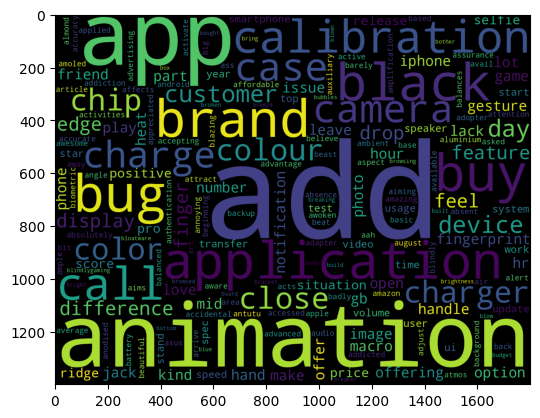

In [ ]:
plt.imshow(wordcloud)

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving positive-words.txt to positive-words.txt


In [ ]:
with open("positive-words.txt") as pw:
    positive_words = pw.read().split("\n")

In [ ]:
positive_words = positive_words[35:]

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving negative-words.txt to negative-words.txt


In [ ]:
with open("negative-words.txt", encoding='latin-1') as nw:
    negative_words = nw.read().split("\n")

In [ ]:
negative_words = negative_words[35:]

In [ ]:
txt_neg_in_nw = ' '.join([word for word in df if word in negative_words])

In [ ]:
wordcloud_neg = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(txt_neg_in_nw)

In [ ]:
txt_pos_in_pw = ' '.join([word for word in df if word in positive_words])

In [ ]:
wordcloud_pos = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(txt_pos_in_pw)

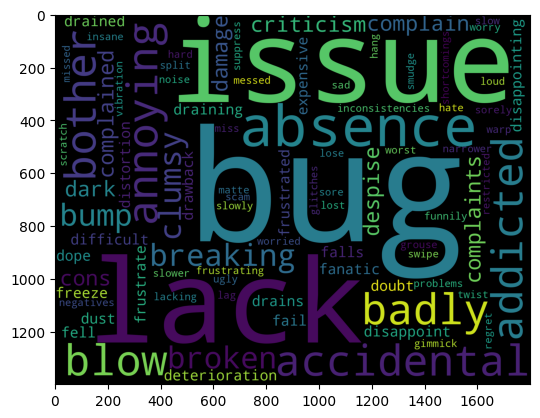

In [ ]:
plt.imshow(wordcloud_neg)

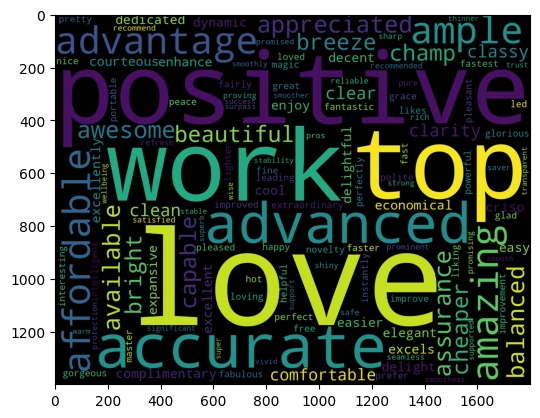

In [ ]:
plt.imshow(wordcloud_pos)